In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [83]:
mydata=pd.read_csv(r"C:\Users\Shreya\Desktop\da n ml\DataSets-master\DataSets-master\drug_dt.csv")

In [84]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Age            200 non-null int64
Sex            200 non-null object
BP             200 non-null object
Cholesterol    200 non-null object
Na_to_K        200 non-null float64
Drug           200 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [85]:
mydata.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


[]

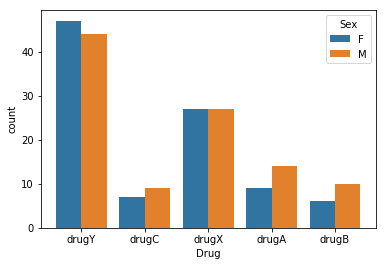

In [86]:
sb.countplot(x='Drug',data=mydata,hue='Sex')
plt.plot()

In [87]:
x=mydata.iloc[:,0:5]
y=mydata.iloc[:,5]

In [88]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [89]:
# F represented by 0 n M by 1

In [90]:
x.Sex[x["Sex"]=='F']=0
x.Sex[x["Sex"]=='M']=1
x.BP[x.BP=="HIGH"]=2
x.BP[x.BP=="NORMAL"]=1
x.BP[x.BP=="LOW"]=0
x.Cholesterol[x.Cholesterol=="HIGH"]=1
x.Cholesterol[x.Cholesterol=="NORMAL"]=0

C:\Users\Shreya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Shreya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Shreya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Shreya\

In [91]:
#convert into array


In [92]:
xx=x.values
yy=y.values

In [93]:
#split
from sklearn.model_selection import train_test_split

In [94]:
x_train,x_test,y_train,y_test=train_test_split(xx,yy,test_size=.30,random_state=101)

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
trainer=DecisionTreeClassifier(criterion='entropy')

In [97]:
learner=trainer.fit(x_train,y_train)

In [98]:
#testing
ya=y_test  #x_test
yp=learner.predict(x_test)

In [99]:
from sklearn.metrics import jaccard_similarity_score,accuracy_score,confusion_matrix

In [100]:
jss=jaccard_similarity_score(ya,yp)
acc=accuracy_score(ya,yp)
print("acc is {} and jss is {}".format(acc*100,jss*100))

acc is 98.33333333333333 and jss is 98.33333333333333


In [101]:
cm=confusion_matrix(ya,yp)
print(cm)

[[ 6  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0 12  1]
 [ 0  0  0  0 26]]


In [102]:
acc=accuracy_score(ya,yp)*100

In [103]:
acc

98.33333333333333

In [104]:
#tree visualisation

In [105]:
import pydotplus
from sklearn import tree

In [108]:
filename="drugtree.png"
featureName=mydata.columns[:5]
targetaName=mydata["Drug"].unique().tolist()

In [109]:
targetaName

['drugY', 'drugC', 'drugX', 'drugA', 'drugB']

In [110]:
featureName

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')

In [114]:
datadot=tree.export_graphviz(learner,feature_names=featureName
                             ,class_names=np.unique(y_train),
                            filled=True,rotate=False)

In [116]:
graph=pydotplus.graph_from_dot_data(datadot)

In [117]:
graph.write_png("mydruggraph.png")

True

In [119]:
from IPython.display import Image

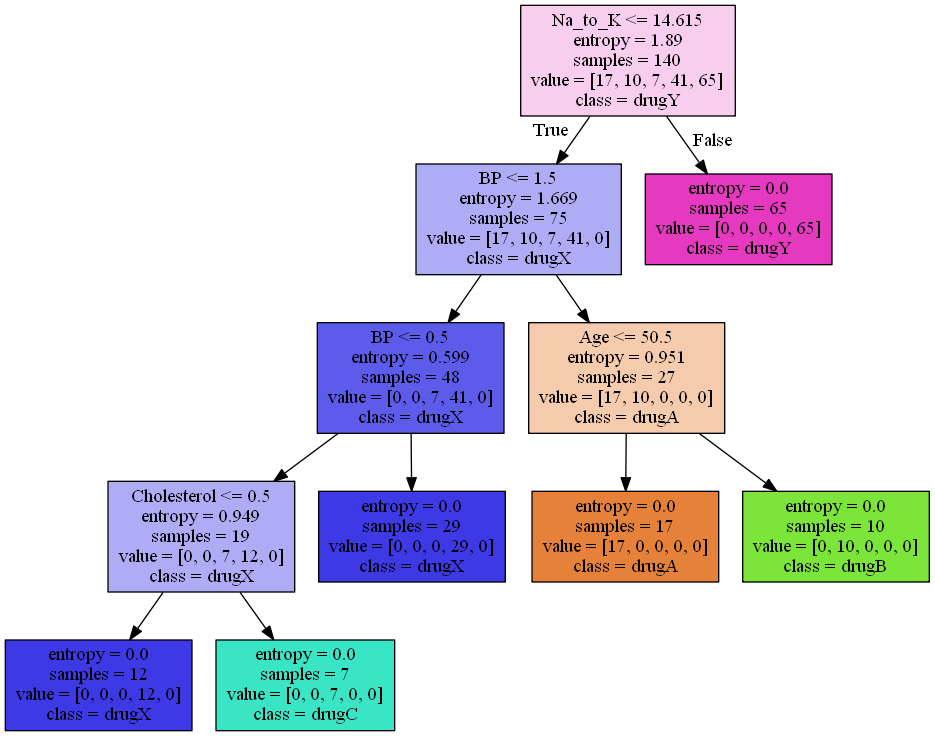

In [122]:
Image(graph.create_png())